In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [53]:
song_data = pd.read_csv("/Users/ramakundurthi/Desktop/hack_project/top50.csv",thousands=',', encoding="cp1252")
song_data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


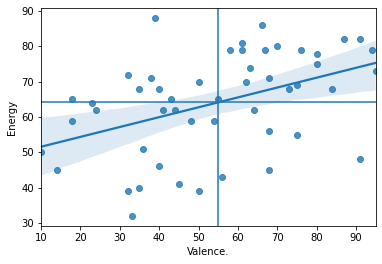

In [15]:
graph=sns.regplot(x=song_data['Valence.'],y=song_data['Energy'])
graph.axvline(55)
graph.axhline(64.172)

<ipython-input-54-02da2f492138>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A,y)[0]


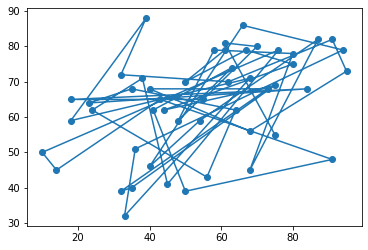

In [54]:
song_data['ones']=1
A = song_data[['Valence.','ones']]
y = song_data['Energy']
m, c = np.linalg.lstsq(A,y)[0]
plt.scatter(song_data['Valence.'],song_data['Energy'])
x = song_data['Valence.']
#plug x in the equation y=mx+c
y_line = c + m * x
plt.plot(x,y)
plt.show()

In [55]:
print(c)
print(m)
song_data["emotion"]=""
for i in range(len(song_data)):
    valence=song_data.loc[i,"Valence."]
    energy=song_data.loc[i,"Energy"]
    if(valence>=55):
        if(energy>=c+m*valence):
            song_data.at[i,"emotion"]="happy"
        elif(energy>=64.172):
            song_data.at[i,"emotion"]="surprise"
        else:
            song_data.at[i,"emotion"]="love"
    else:
        if(energy<c+m*valence):
            song_data.at[i,"emotion"]="sad"
        elif(energy<64.172):
            song_data.at[i,"emotion"]="fear"
        else:
            song_data.at[i,"emotion"]="angry"
        
song_data
    




48.79362022416755
0.27960402519839656


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,ones,emotion
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,1,love
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,1,happy
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,1,happy
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1,happy
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,1,angry
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,1,surprise
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,1,fear
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,1,angry
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87,1,love
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,1,love


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
numberCol=[]
for i in range(len(song_data)):
    if(song_data.loc[i, "emotion"] == "happy"):
        numberCol.append(0)
    if(song_data.loc[i, "emotion"] == "sad"):
        numberCol.append(1)
    if(song_data.loc[i, "emotion"] == "angry"):
        numberCol.append(2)
    if(song_data.loc[i, "emotion"] == "love"):
        numberCol.append(3)
    if(song_data.loc[i, "emotion"] == "surprise"):
        numberCol.append(4)
    if(song_data.loc[i, "emotion"] == "fear"):
        numberCol.append(5)
song_data["Target"]=numberCol
song_data.head()
X = song_data.values[:, 4:13]
y = song_data.values[:,15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
#classifier.fit(X_train, y_train) 

In [104]:
print(accuracy_score(y_test,y_preds))

0.5


In [23]:
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svc=SVC(kernel="linear",C=1) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8


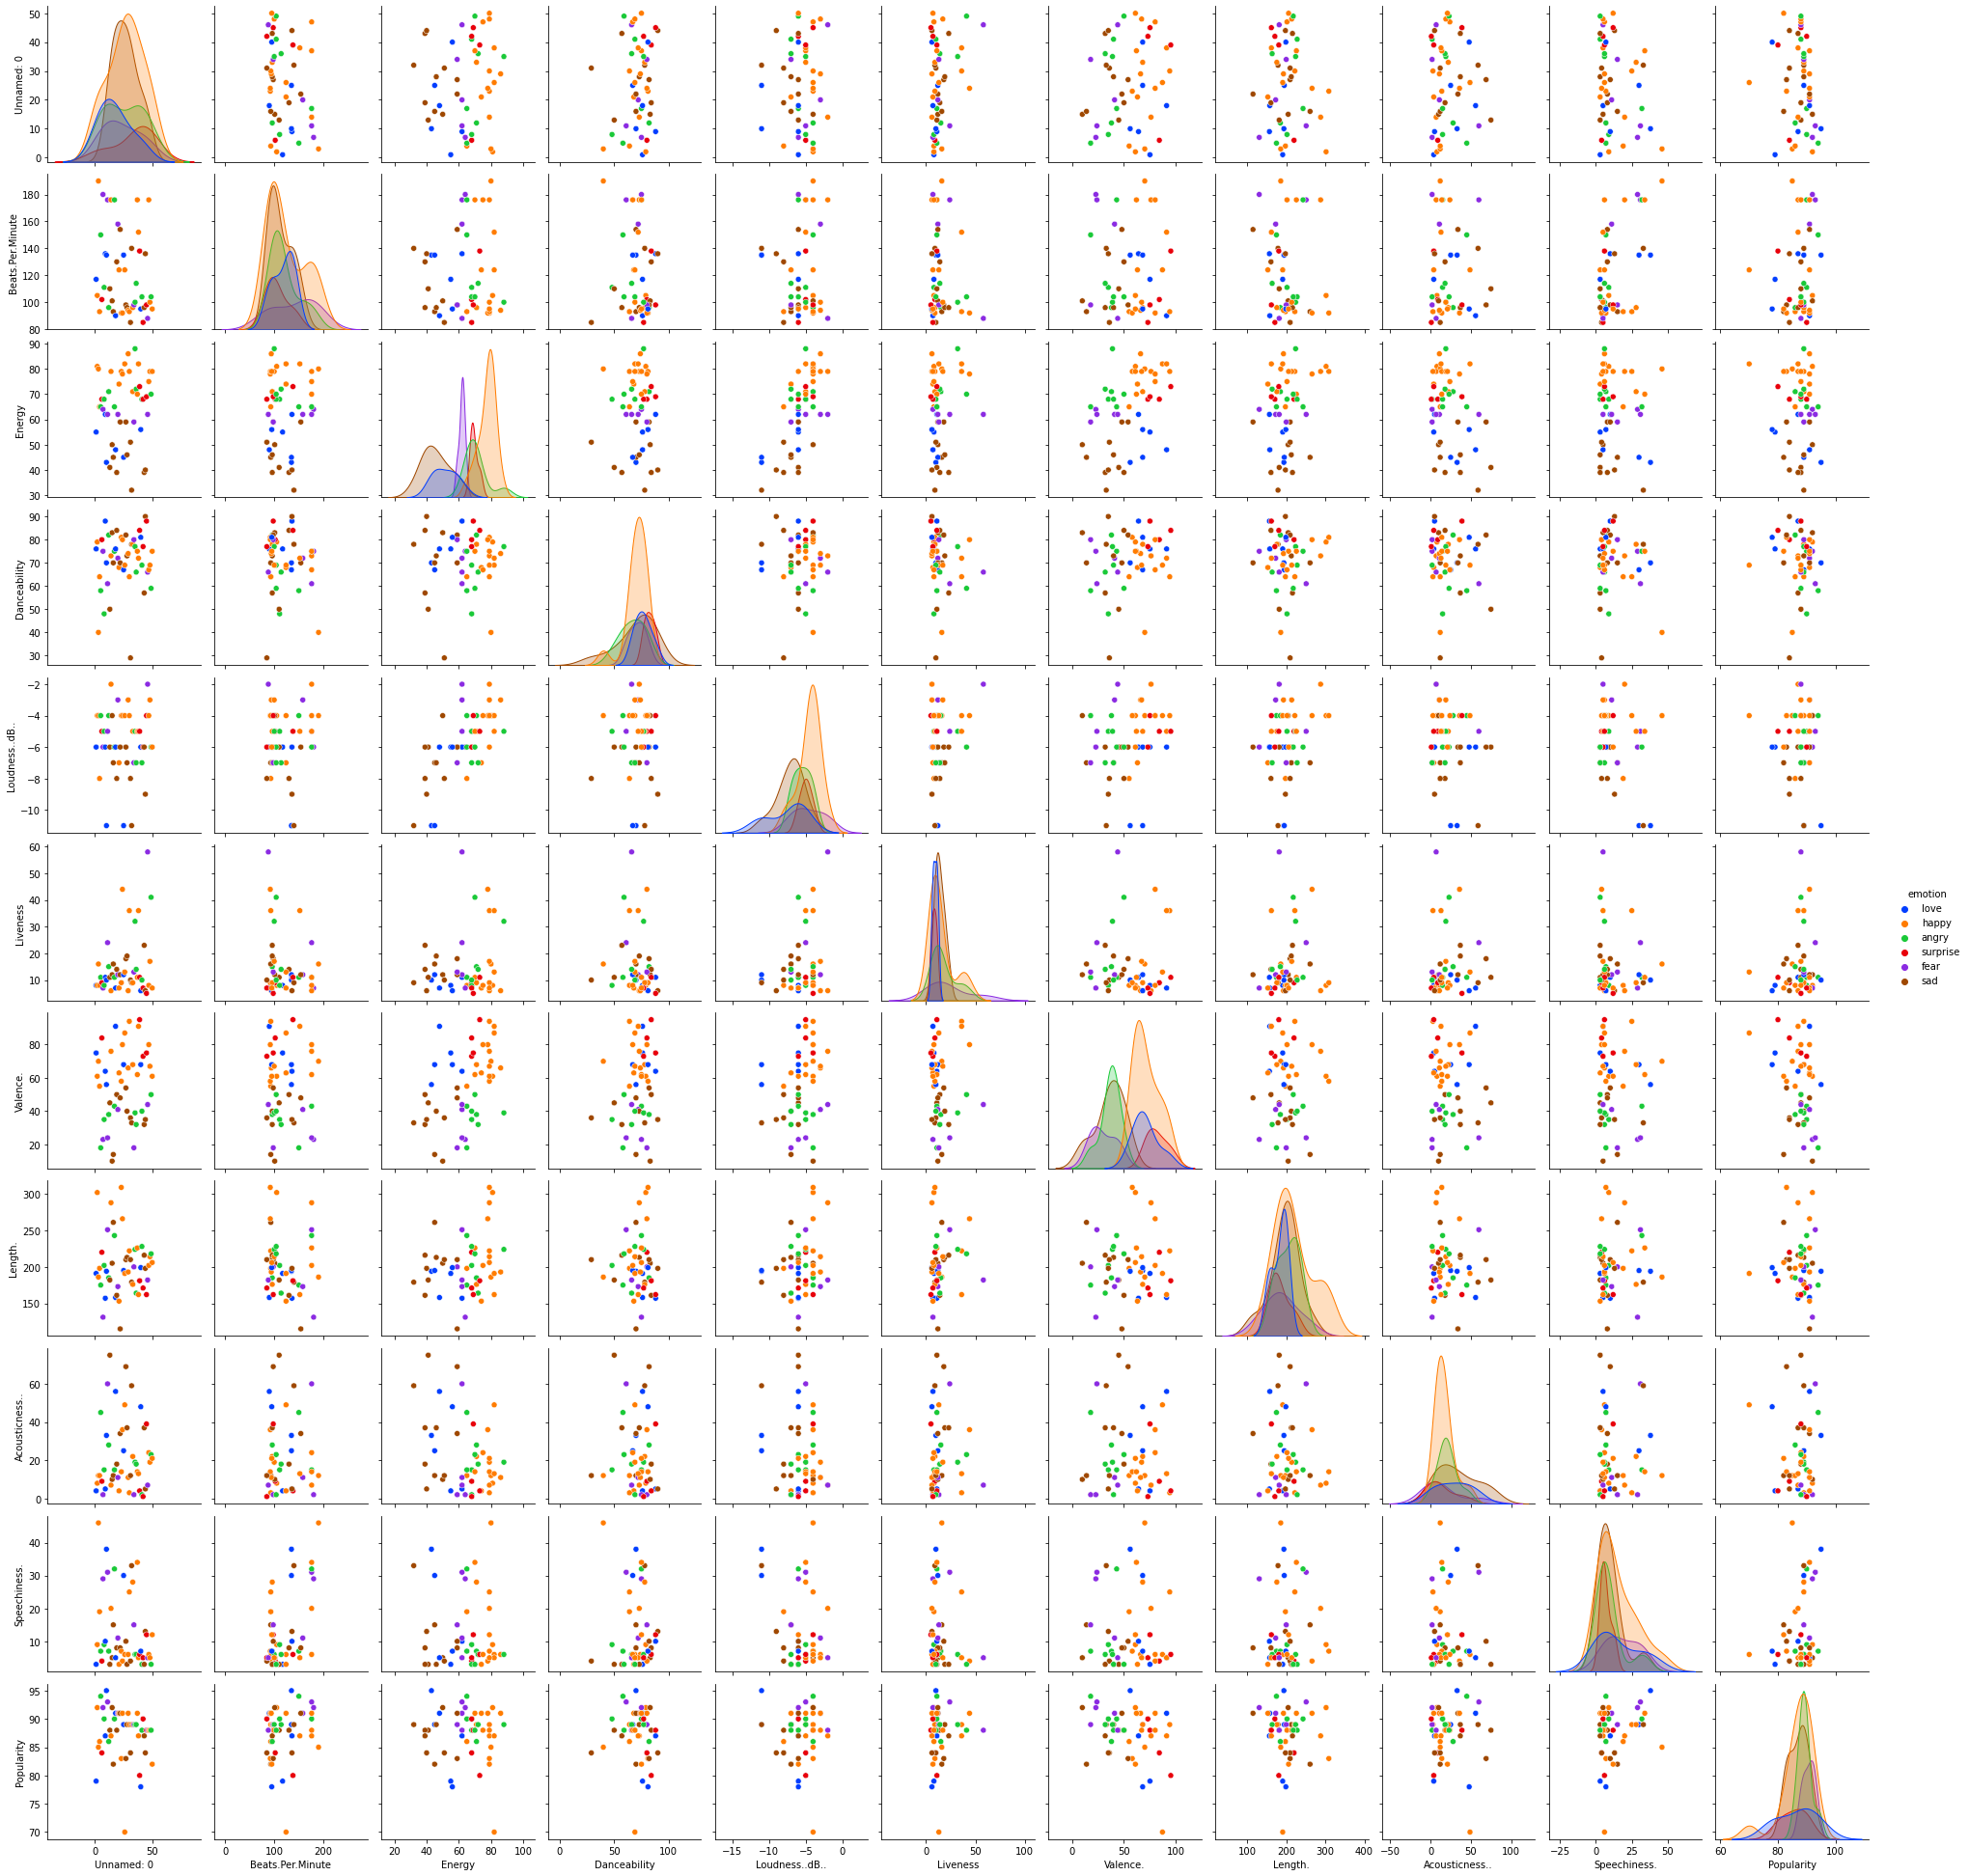

In [61]:
sns.pairplot(song_data, hue="emotion",palette="bright")


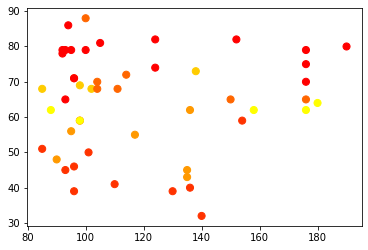

In [11]:
df=pd.DataFrame(song_data)
df=df.replace('happy', 0)
df=df.replace('sad', 1)
df=df.replace('angry', 2)
df=df.replace('love', 3)
df=df.replace('surprise', 4)
df=df.replace('fear', 5)
df
X=df.iloc[:,4:13]
y=df['emotion']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

In [57]:
song_data2=pd.read_csv("/Users/ramakundurthi/Desktop/hack_project/Spotify-2000.csv",thousands=',')
song_data2.head()
y_preds=svc.predict(song_data2.values[:,5:14])
song_data2["emotion"]=y_preds

In [25]:
song_data2

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,emotion
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,angry
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,happy
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,angry
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,angry
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,surprise
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,happy
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,happy
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,angry


In [77]:
song_data=song_data.rename(columns={'Unnamed: 0': 'Index', 'Track.Name': 'Track', 'Artist.Name':'Artist', 'Beats.Per.Minute':'Beats Per Minute (BPM)', 'Valence.':'Valence', 'Speechiness.':'Speechiness', 'Acousticness..':'Acousticness', 'Loudness..dB..': 'Loudness (dB)', 'Length.':'Length'})
#song_data=song_data.drop('ones',axis=1)
song_data2.head()


,Index,Title,Artist,Genre,Beats.Per.Minute,Energy,Danceability,Loudness (dB),Liveness,Valence,Length.,Acousticness,Speechiness,Popularity,emotion
0,1,Sunrise,Norah Jones,adult standards,157,30,53,-14,11,68,201,94,3,71,angry
1,2,Black Night,Deep Purple,album rock,135,79,50,-11,17,81,207,17,7,39,happy
2,3,Clint Eastwood,Gorillaz,alternative hip hop,168,69,66,-9,7,52,341,2,17,69,angry
3,4,The Pretender,Foo Fighters,alternative metal,173,96,43,-4,3,37,269,0,4,76,angry
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,106,82,58,-5,10,87,256,1,3,59,happy


In [78]:
my_list = song_data.columns.values.tolist()
my_list
song_data.head()

,Index,Track,Artist,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,emotion
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,love
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,happy
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,happy
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,happy
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,angry


In [84]:
song_data.head()

,Index,Track,Artist,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,emotion
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,love
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,happy
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,happy
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,happy
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,angry


In [86]:
song_data2=song_data2.rename(columns={'Top Genre':'Genre','Beats.Per.Minute':'Beats Per Minute (BPM)', 'Length.':'Length', 'Title':'Track'})
#song_data=song_data.drop('Target',axis=1)
#song_data2=song_data2.drop('Year',axis=1)
song_data2.head()

,Index,Track,Artist,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,emotion
0,1,Sunrise,Norah Jones,adult standards,157,30,53,-14,11,68,201,94,3,71,angry
1,2,Black Night,Deep Purple,album rock,135,79,50,-11,17,81,207,17,7,39,happy
2,3,Clint Eastwood,Gorillaz,alternative hip hop,168,69,66,-9,7,52,341,2,17,69,angry
3,4,The Pretender,Foo Fighters,alternative metal,173,96,43,-4,3,37,269,0,4,76,angry
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,106,82,58,-5,10,87,256,1,3,59,happy


In [87]:
df=song_data.append(song_data2, ignore_index=True)
df

,Index,Track,Artist,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,emotion
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,love
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,happy
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,happy
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,happy
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,1990,Heartbreak Hotel,Elvis Presley,adult standards,94,21,70,-12,11,72,128,84,7,63,surprise
2040,1991,Hound Dog,Elvis Presley,adult standards,175,76,36,-8,76,95,136,73,6,69,happy
2041,1992,Johnny B. Goode,Chuck Berry,blues rock,168,80,53,-9,31,97,162,74,7,74,happy
2042,1993,Take Five,The Dave Brubeck Quartet,bebop,174,26,45,-13,7,60,324,54,4,65,angry


In [88]:
df.to_csv('VybeSongs.csv')

In [12]:
data = pd.read_csv("/Users/ramakundurthi/Desktop/vybeserver/VybeSongs.csv",thousands=',', encoding="utf8")
data.head()

,Unnamed: 0,Index,Track,Artist,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,emotion
0,0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,love
1,1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,happy
2,2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,happy
3,3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,happy
4,4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,angry
